In [34]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv("income (1).csv")

In [36]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


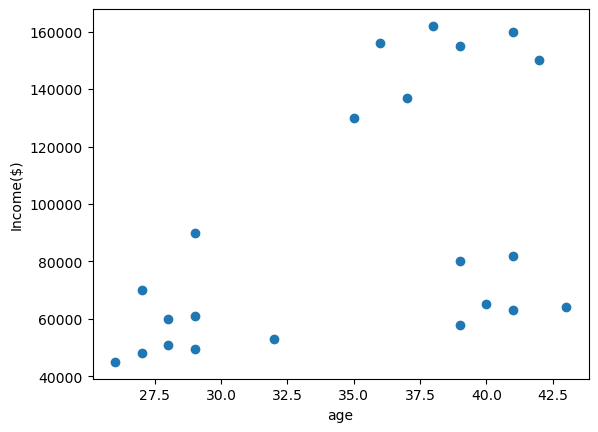

In [37]:
plt.scatter(df["Age"],df["Income($)"])
plt.xlabel("age")
plt.ylabel("Income($)")
plt.show()

In [38]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])


In [39]:
df

,Name,Age,Income($)
0,Rob,27,0.213675
1,Michael,29,0.384615
2,Mohan,29,0.136752
3,Ismail,28,0.128205
4,Kory,42,0.897436
5,Gautam,39,0.940171
6,David,41,0.982906
7,Andrea,38,1.000000
8,Brad,36,0.948718
9,Angelina,35,0.726496


In [40]:
scaler = MinMaxScaler()
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

In [41]:
df

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [42]:
km = KMeans(n_clusters =3)
y_predicted = km.fit_predict(df[["Age","Income($)"]])

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [45]:
df["cluster"] = y_predicted

In [46]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [19]:
km.cluster_centers_

array([[28.33333333,  0.11633428],
       [40.55555556,  0.44824311],
       [36.5       ,  0.86538462]])

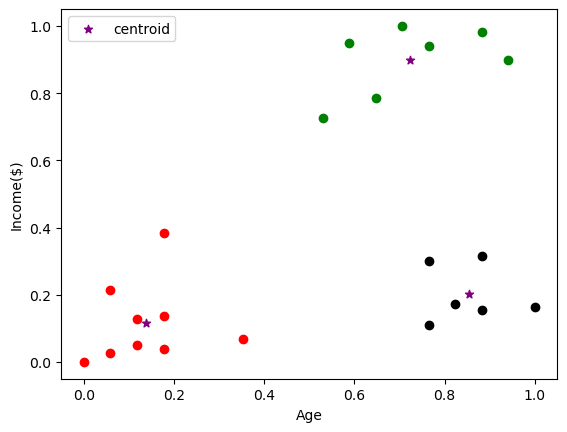

In [48]:
df0 = df[df.cluster ==0]
df1 = df[df.cluster ==1]
df2 = df[df.cluster==2]
plt.scatter(df0["Age"],df0["Income($)"],color ="green")
plt.scatter(df1["Age"],df1["Income($)"],color ="red")
plt.scatter(df2["Age"],df2["Income($)"],color = "black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color ="purple",marker = "*",label ="centroid" )
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

# USING ELBOW METHOD

In [50]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters =k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)
    


C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less ch

In [51]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.26640301246684156,
 0.21055478995472496,
 0.16869711728567788,
 0.13265419827245162,
 0.10497488680620906]

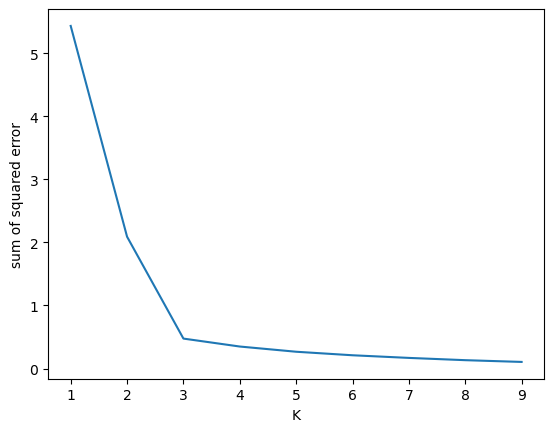

In [52]:
plt.xlabel("K")
plt.ylabel("sum of squared error")
plt.plot(k_rng,sse)

ModuleNotFoundError: No module named 'tensorflow'